##Installation

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()


✨🍰✨ Everything looks OK!


In [2]:
!conda create -n SDAL python=3.10 -y
!source /usr/local/etc/profile.d/conda.sh && conda activate SDAL

!conda install -c conda-forge root=6.28.10 -y

import os
os.environ["PATH"] = "/usr/local/envs/SDAL/bin:" + os.environ["PATH"]
os.environ["PYTHONPATH"] = "/usr/local/envs/SDAL/lib/python3.10/site-packages"


Streaming output truncated to the last 5000 lines.

readline-8.2         | 276 KB    | : 100% 1.0/1 [00:01<00:00,  1.90s/it]








readline-8.2         | 276 KB    | : 100% 1.0/1 [00:01<00:00,  1.90s/it]









ca-certificates-2025 | 154 KB    | : 100% 1.0/1 [00:01<00:00,  1.94s/it]









ca-certificates-2025 | 154 KB    | : 100% 1.0/1 [00:01<00:00,  1.94s/it]







libgomp-14.2.0       | 449 KB    | : 100% 1.0/1 [00:02<00:00,  1.99s/it]







libgomp-14.2.0       | 449 KB    | : 100% 1.0/1 [00:02<00:00,  1.99s/it]











liblzma-5.6.4        | 109 KB    | : 100% 1.0/1 [00:02<00:00,  2.08s/it]











liblzma-5.6.4        | 109 KB    | : 100% 1.0/1 [00:02<00:00,  2.08s/it]












libffi-3.4.6         | 56 KB     | : 100% 1.0/1 [00:02<00:00,  2.20s/it]












libffi-3.4.6         | 56 KB     | : 100% 1.0/1 [00:02<00:00,  2.20s/it]



ncurses-6.5          | 871 KB    | : 100% 1.0/1 [00:02<00:00,  4.33it/s]













libgcc-ng-14.2.0     | 52 KB     | : 100% 1

##START HERE


$$
\LARGE \color{red}{\textbf{! If the session crashes, please start from here. !}}
$$

In [3]:
import ROOT
import math
print(ROOT.gROOT.GetVersion())

Welcome to JupyROOT 6.28/10
6.28/10


## **Divide Method in TH1**


Info in <TCanvas::Print>: png file RatioPlot_Divide_Method_Result.png has been created


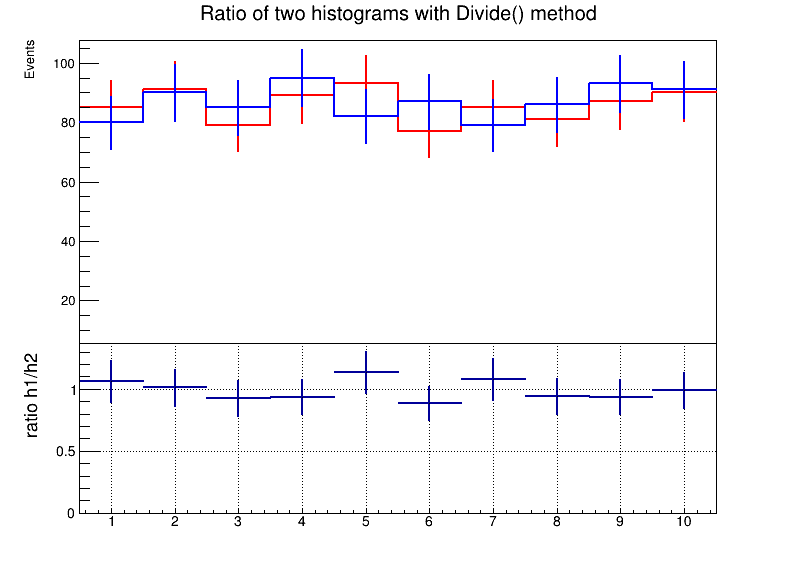

In [4]:
# We define the two lists/arrays of counts :
numerator_divide = [85, 91, 79, 89, 93, 77, 85, 81, 87, 90]
denumerator_divide = [80, 90, 85, 95, 82, 87, 79, 86, 93, 91]

num_bins_divide = len(numerator_divide) # the bins of the histograms to be built is taken from the length of the list

# Create histograms for numerator and denominator
hist_numerator_divide = ROOT.TH1F("hist_numerator", "Numerator; Bin Number; Events", num_bins_divide, 0.5, num_bins_divide + 0.5)
hist_denumerator_divide = ROOT.TH1F("hist_denumerator", "Denominator; Bin Number; Events", num_bins_divide, 0.5, num_bins_divide + 0.5)

# Apply some options useful later
hist_numerator_divide.SetMinimum(0)
hist_denumerator_divide.SetMinimum(0)
hist_numerator_divide.SetStats(0)
hist_numerator_divide.GetXaxis().SetLabelSize(0.0)

# Fill the histograms
for i in range(num_bins_divide):
    hist_numerator_divide.SetBinContent(i + 1, numerator_divide[i])
    hist_denumerator_divide.SetBinContent(i + 1, denumerator_divide[i])

# Clone the numerator and apply Sumw2 (necessary for error calculation in the Divide operation)
hist_numerator_divide_clone = hist_numerator_divide.Clone("hist_numerator_clone")
hist_numerator_divide_clone.Sumw2()            #the error will not be calculated as expected if we dont execute this CRUCIAL line!

# Now let's divide histograms (numerator/denominator)
hist_numerator_divide_clone.Divide(hist_denumerator_divide)

# Adopt options for a pleasent graphical representation of the ratio plot:

hist_numerator_divide_clone.SetTitle("")
hist_numerator_divide_clone.SetLineWidth(2)

# Adjust y-axis settings
y_divide = hist_numerator_divide_clone.GetYaxis()
y_divide.SetTitle("ratio h1/h2 ")
y_divide.SetNdivisions(505)
y_divide.SetTitleSize(20)
y_divide.SetTitleFont(43)
y_divide.SetTitleOffset(1.55)
y_divide.SetLabelFont(43)
y_divide.SetLabelSize(15)

# Adjust x-axis settings
x_divide = hist_numerator_divide_clone.GetXaxis()
x_divide.SetTitleSize(20)
x_divide.SetTitleFont(43)
x_divide.SetTitleOffset(4.0)
x_divide.SetLabelFont(43)
x_divide.SetLabelSize(15)

# Create canvas with two pads
canvas_divide = ROOT.TCanvas("canvas_divide", "TRatioPlot Divide Method", 800, 600)

# Upper pad for the numerator and denominator histograms
pad1_divide = ROOT.TPad("pad1_divide", "pad1_divide", 0, 0.3, 1, 1)
pad1_divide.SetBottomMargin(0.1)
pad1_divide.Draw()
pad1_divide.cd()

# Drawing options for the numerator and denominator histograms
hist_numerator_divide.SetLineColor(ROOT.kRed)
hist_numerator_divide.SetLineWidth(2)
hist_numerator_divide.SetTitle("Ratio of two histograms with Divide() method; Bin Number; Events")

hist_denumerator_divide.SetLineColor(ROOT.kBlue)
hist_denumerator_divide.SetLineWidth(2)

# Draw the numerator (red) and denominator (blue) histograms superimposed (in the upper pad)
hist_numerator_divide.Draw("EHIST")
hist_denumerator_divide.Draw("EHIST SAME")

# Lower pad for the ratio plot
canvas_divide.cd()  # Return to the main canvas before defining pad2
pad2_divide = ROOT.TPad("pad2_divide", "pad2_divide", 0, 0.05, 1, 0.4)
pad2_divide.SetTopMargin(0)
pad2_divide.SetBottomMargin(0.15)
pad2_divide.SetGridx()
pad2_divide.SetGridy()
pad2_divide.Draw()
pad2_divide.cd()

# Draw RATIO PLOT (in the lower pad)
hist_numerator_divide_clone.Draw("EP")

# Effectively draw the canvas with both pads and their content
canvas_divide.Update()
canvas_divide.Draw()
canvas_divide.SaveAs("RatioPlot_Divide_Method_Result.png")


In [5]:
print("Divide() method results:\n")
print(f"{'Bin':^5} | {'Ratio':^7} | {'± Error':^7} |")
print("-" * 30)

for i in range(num_bins_divide):
    ratio_divide = hist_numerator_divide.GetBinContent(i + 1) / hist_denumerator_divide.GetBinContent(i + 1)
    error_divide = hist_numerator_divide_clone.GetBinError(i+1)
    print(f"{i + 1:^5} | {ratio_divide:^7.4f} | ±{error_divide:^7.4f} |")


Divide() method results:

 Bin  |  Ratio  | ± Error |
------------------------------
  1   | 1.0625  | ±0.1655  |
  2   | 1.0111  | ±0.1503  |
  3   | 0.9294  | ±0.1452  |
  4   | 0.9368  | ±0.1382  |
  5   | 1.1341  | ±0.1718  |
  6   | 0.8851  | ±0.1385  |
  7   | 1.0759  | ±0.1681  |
  8   | 0.9419  | ±0.1458  |
  9   | 0.9355  | ±0.1395  |
 10   | 0.9890  | ±0.1470  |


## **Manual Calculation**


Function which calculates ratio and its uncertainty applying the standard formula for propagation of errors (assuming uncorrelation)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_manual
Info in <TCanvas::Print>: png file manual_calculation_ratio.png has been created


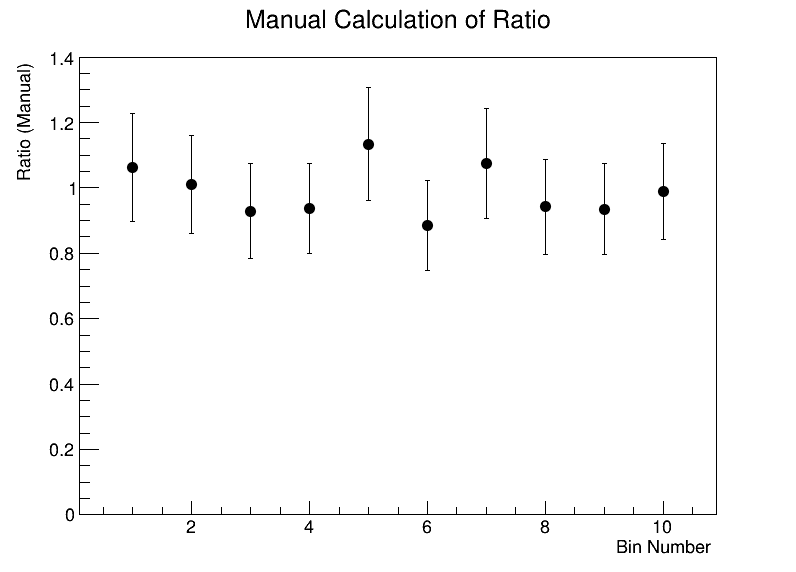

In [ ]:
def manual_calculation(numerator, denumerator):
    if numerator == 0 or denumerator == 0:
        return 0, 0
    ratio_manual = numerator / denumerator
    sigma_numerator_manual = math.sqrt(numerator)  # Poisson error assumption: sqrt(A)
    sigma_denumerator_manual = math.sqrt(denumerator)  # Poisson error assumption: sqrt(B)

    # Gaussian error propagation formula
    sigma_R_manual = ratio_manual * math.sqrt((sigma_numerator_manual / numerator) ** 2 + (sigma_denumerator_manual / denumerator) ** 2)

    return ratio_manual, sigma_R_manual, sigma_numerator_manual, sigma_denumerator_manual


# same 2 lists as before for numerator and denominator
numerator_manual = [85, 91, 79, 89, 93, 77, 85, 81, 87, 90]
denumerator_manual = [80, 90, 85, 95, 82, 87, 79, 86, 93, 91]
num_bins_manual = len(numerator_manual)

# Initialize empty lists to store manual results
ratios_manual = []
errors_manual = []
sigma_numerator_manual = []
sigma_denumerator_manual = []

# For each bin, calculate ratio and error
for i in range(num_bins_divide):
    A = numerator_manual[i]
    B = denumerator_manual[i]

    # Call the manual_calculation function
    ratio_manual, error_manual, sigma_numerator, sigma_denumerator = manual_calculation(A, B)

    # Store the results
    ratios_manual.append(ratio_manual)
    errors_manual.append(error_manual)
    sigma_numerator_manual.append(sigma_numerator)
    sigma_denumerator_manual.append(sigma_denumerator)

# Prepare the canvas
canvas_manual = ROOT.TCanvas("canvas_manual", "Manual Calculation of Ratio", 800, 600)

# Create a TGraphErrors object for the manual ratio plot
graph_manual = ROOT.TGraphErrors(num_bins_manual)

# Add the calculated ratio and errors to the graph
for i in range(num_bins_manual):
    graph_manual.SetPoint(i, i + 1, ratios_manual[i])  # X: bin number, Y: ratio
    graph_manual.SetPointError(i, 0, errors_manual[i])  # Y error: computed error

graph_manual.SetMinimum(0)
graph_manual.SetMaximum(1.4)
graph_manual.SetTitle("Manual Calculation of Ratio")
graph_manual.GetXaxis().SetTitle("Bin Number")
graph_manual.GetYaxis().SetTitle("Ratio (Manual)")
graph_manual.SetMarkerStyle(20)
graph_manual.SetMarkerSize(1.4)
graph_manual.Draw("AP")
canvas_manual.Draw()
canvas_manual.SaveAs("manual_calculation_ratio.png")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_manual
Warning in <TROOT::Append>: Replacing existing TH1: hist_numerator_manual (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_denumerator_manual (Potential memory leak).
Info in <TCanvas::Print>: png file manual_calculation_ratio_with_histograms.png has been created


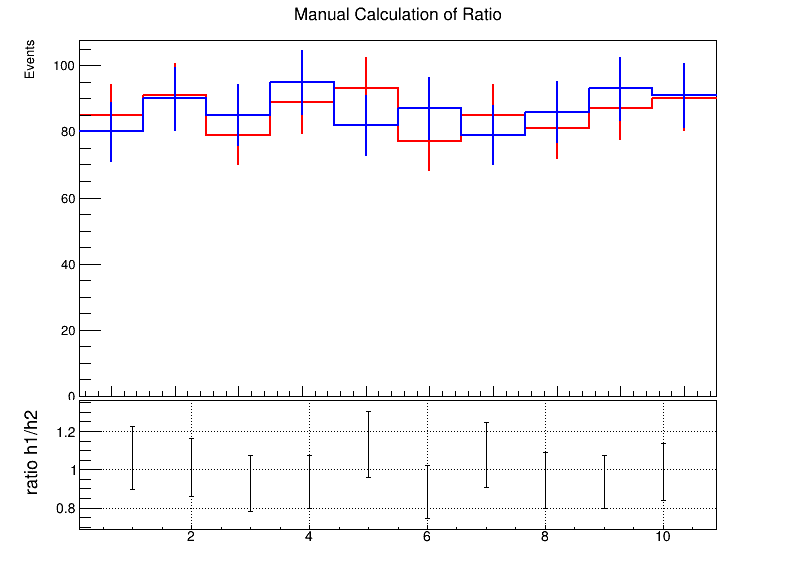

In [ ]:
# We can of course create a similar canvas as above discussing the Divide() method

canvas_manual = ROOT.TCanvas("canvas_manual", "Manual Calculation of Ratio", 800, 600)

# Upper pad for the numerator and denominator histograms
pad1_manual = ROOT.TPad("pad1_manual", "pad1_manual", 0, 0.3, 1, 1)
pad1_manual.SetBottomMargin(0.01)
pad1_manual.Draw()
pad1_manual.cd()

hist_numerator_manual = ROOT.TH1F("hist_numerator_manual", "Numerator; Bin Number; Events", num_bins_manual, 0.5, num_bins_manual + 0.5)
hist_denumerator_manual = ROOT.TH1F("hist_denumerator_manual", "Denominator; Bin Number; Events", num_bins_manual, 0.5, num_bins_manual + 0.5)
hist_numerator_manual.SetMinimum(0)
hist_denumerator_manual.SetMinimum(0)
hist_numerator_manual.SetStats(0)
hist_numerator_manual.GetXaxis().SetLabelSize(0.0)

for i in range(num_bins_manual):
    hist_numerator_manual.SetBinContent(i + 1, numerator_divide[i])
    hist_denumerator_manual.SetBinContent(i + 1, denumerator_divide[i])

hist_numerator_manual.SetLineColor(ROOT.kRed)
hist_numerator_manual.SetLineWidth(2)
hist_numerator_manual.SetTitle("Manual Calculation of Ratio")

hist_denumerator_manual.SetLineColor(ROOT.kBlue)
hist_denumerator_manual.SetLineWidth(2)

hist_numerator_manual.Draw("EHIST")
hist_denumerator_manual.Draw("EHIST SAME")

canvas_manual.cd()
pad2_manual = ROOT.TPad("pad2_manual", "pad2_manual", 0, 0.05, 1, 0.3)
pad2_manual.SetTopMargin(0)
pad2_manual.SetBottomMargin(0.1)
pad2_manual.SetGridx()
pad2_manual.SetGridy()
pad2_manual.Draw()
pad2_manual.cd()

graph_manual = ROOT.TGraphErrors(num_bins_manual)

for i in range(num_bins_manual):
    graph_manual.SetPoint(i, i + 1, ratios_manual[i])  # X: bin number, Y: ratio
    graph_manual.SetPointError(i, 0, errors_manual[i])  # Y error: computed error

graph_manual.SetTitle("")
graph_manual.GetXaxis().SetTitle("Bin Number")
graph_manual.GetYaxis().SetTitle("Ratio (Manual)")

y_manual = graph_manual.GetYaxis()
y_manual.SetTitle("ratio h1/h2 ")
y_manual.SetNdivisions(505)
y_manual.SetTitleSize(20)
y_manual.SetTitleFont(43)
y_manual.SetTitleOffset(1.55)
y_manual.SetLabelFont(43)
y_manual.SetLabelSize(15)

# Adjust x-axis settings
x_manual = graph_manual.GetXaxis()

x_manual.SetTitleSize(20)
x_manual.SetTitleFont(43)
x_manual.SetTitleOffset(4.0)
x_manual.SetLabelFont(43)
x_manual.SetLabelSize(15)

graph_manual.Draw("AP")

canvas_manual.Update()
canvas_manual.Draw()

canvas_manual.SaveAs("manual_calculation_ratio_with_histograms.png")




In [ ]:
print("Manual calculation method\n")
print(f"{'Bin':^5} | {'Ratio':^7} | {'± Error':^7} |")
print("-" * 30)

for i in range(num_bins_manual):
    print(f"{i+1:^5} | {ratios_manual[i]:^7.4} | {errors_manual[i]:^7.4} |")

Manual calculation method

 Bin  |  Ratio  | ± Error |
------------------------------
  1   |  1.062  | 0.1655  |
  2   |  1.011  | 0.1503  |
  3   | 0.9294  | 0.1452  |
  4   | 0.9368  | 0.1382  |
  5   |  1.134  | 0.1718  |
  6   | 0.8851  | 0.1385  |
  7   |  1.076  | 0.1681  |
  8   | 0.9419  | 0.1458  |
  9   | 0.9355  | 0.1395  |
 10   |  0.989  |  0.147  |


## **Divide( ) vs. Manual Calculation**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_combined
Info in <TCanvas::Print>: png file manual_vs_divide_ratio.png has been created


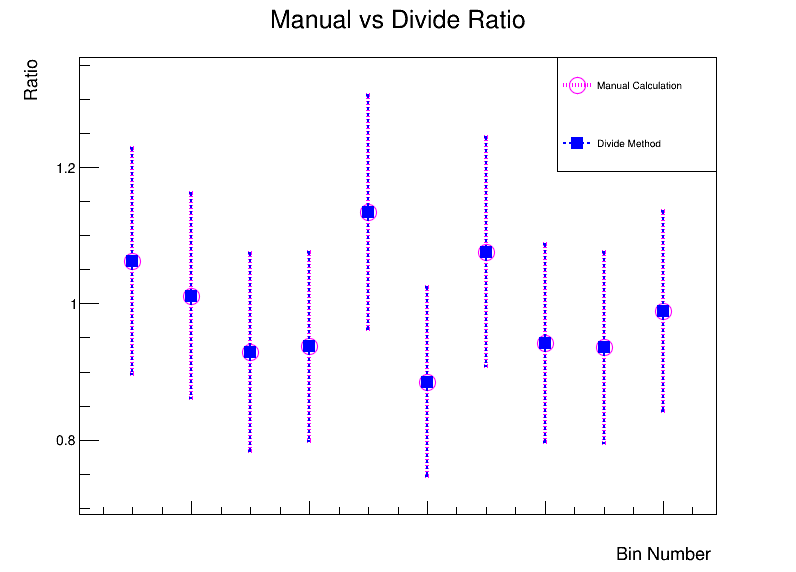

In [ ]:
# Create a new canvas for the ratio plot
canvas_combined = ROOT.TCanvas("canvas_combined", "Manual vs Divide Ratio", 800, 600)

# Create empty graph for Divide method
graph_divide = ROOT.TGraphErrors(num_bins_divide)

# Calculate ratios and errors for Divide method
for i in range(num_bins_divide):
    ratio_divide = hist_numerator_divide.GetBinContent(i + 1) / hist_denumerator_divide.GetBinContent(i + 1)
    error_divide = hist_numerator_divide_clone.GetBinError(i + 1)

    graph_divide.SetPoint(i, i + 1, ratio_divide)  # X: bin number, Y: ratio
    graph_divide.SetPointError(i, 0, error_divide)  # Y error: computed error

# Draw the manual graph (already filled)
graph_manual.SetTitle("Manual vs Divide Ratio")
graph_manual.GetXaxis().SetTitle("Bin Number")
graph_manual.GetYaxis().SetTitle("Ratio")

graph_manual.SetMarkerStyle(24)   #21
graph_manual.SetMarkerSize(2)
graph_manual.SetLineWidth(4)
graph_manual.SetMarkerColor(ROOT.kMagenta)
graph_manual.SetLineColor(ROOT.kMagenta)
graph_manual.SetLineStyle(3)

graph_manual.GetXaxis().SetLabelSize(0.04)
graph_manual.GetXaxis().SetTitleOffset(1.2)

graph_manual.Draw("AP")

# Draw Divide method graph on the same canvas
graph_divide.SetLineColor(ROOT.kBlue)
graph_divide.SetMarkerColor(ROOT.kBlue)
graph_divide.SetMarkerStyle(21) #24
graph_divide.SetMarkerSize(1.5)
graph_divide.SetLineWidth(2)
graph_divide.SetLineStyle(2)

graph_divide.Draw("P SAME")

# Optional: Draw legend to distinguish the two methods
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(graph_manual, "Manual Calculation", "pl")
legend.AddEntry(graph_divide, "Divide Method", "pl")
legend.Draw()

canvas_combined.Update()
canvas_combined.Draw()

canvas_combined.SaveAs("manual_vs_divide_ratio.png")


